# Computer Vision color spaces

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [3]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
img = cv2.imread('img/surfer.jpg')
img_copy = img.copy()

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [11]:
# Load a color image and split in is different B, G and R channels
B,G,R = cv2.split(img_copy)
B, G, R

(array([[246, 246, 246, ..., 177, 181, 181],
        [246, 246, 246, ..., 176, 178, 178],
        [246, 246, 246, ..., 177, 177, 177],
        ...,
        [ 96,  96,  96, ..., 123, 119, 119],
        [ 96,  96,  96, ..., 123, 119, 119],
        [ 96,  96,  96, ..., 123, 120, 120]], dtype=uint8),
 array([[237, 237, 237, ..., 190, 193, 193],
        [237, 237, 237, ..., 188, 190, 190],
        [237, 237, 237, ..., 188, 188, 188],
        ...,
        [ 90,  90,  90, ..., 122, 119, 119],
        [ 90,  90,  90, ..., 122, 118, 118],
        [ 90,  90,  90, ..., 122, 119, 119]], dtype=uint8),
 array([[200, 200, 200, ...,  88,  93,  93],
        [200, 200, 200, ...,  88,  90,  90],
        [200, 200, 200, ...,  91,  91,  91],
        ...,
        [ 23,  23,  23, ...,  54,  49,  49],
        [ 23,  23,  23, ...,  54,  50,  50],
        [ 23,  23,  23, ...,  54,  51,  51]], dtype=uint8))

[Hint](# "cv2.split") 

In [2]:
# Show each channel channel on screen


#### Merging the color channels

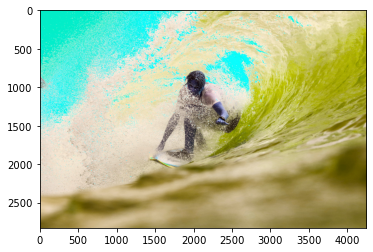

In [12]:
# Modify a channel and then merge them all again
B = B + 12
new = cv2.merge([B,G,R])
plt.imshow(new)

[Hint](# "cv2.merge") 

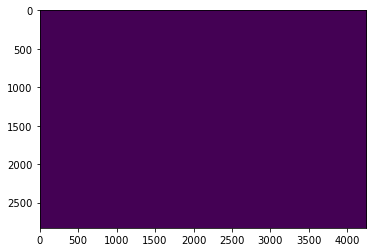

In [32]:
# Create a black canvas with the same size as the image you loaded
size = new.shape
black = np.zeros(size[:2], dtype="uint8")
plt.imshow(black)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

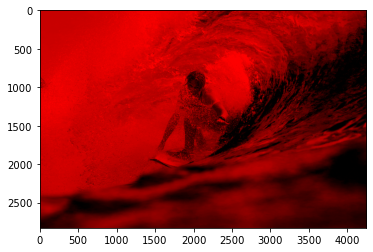

In [34]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
red = cv2.merge([R,black, black])
green = cv2.merge([black,G,black])
blue = cv2.merge([black,black,B])
plt.imshow(red)

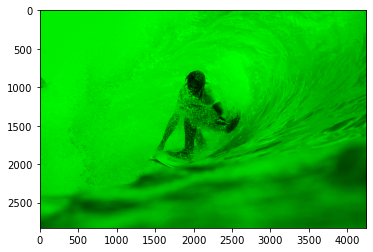

In [35]:
plt.imshow(green)

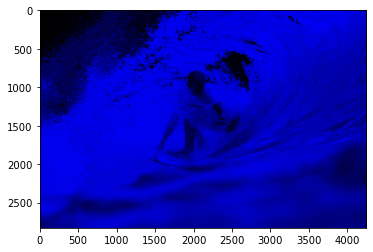

In [36]:
plt.imshow(blue)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

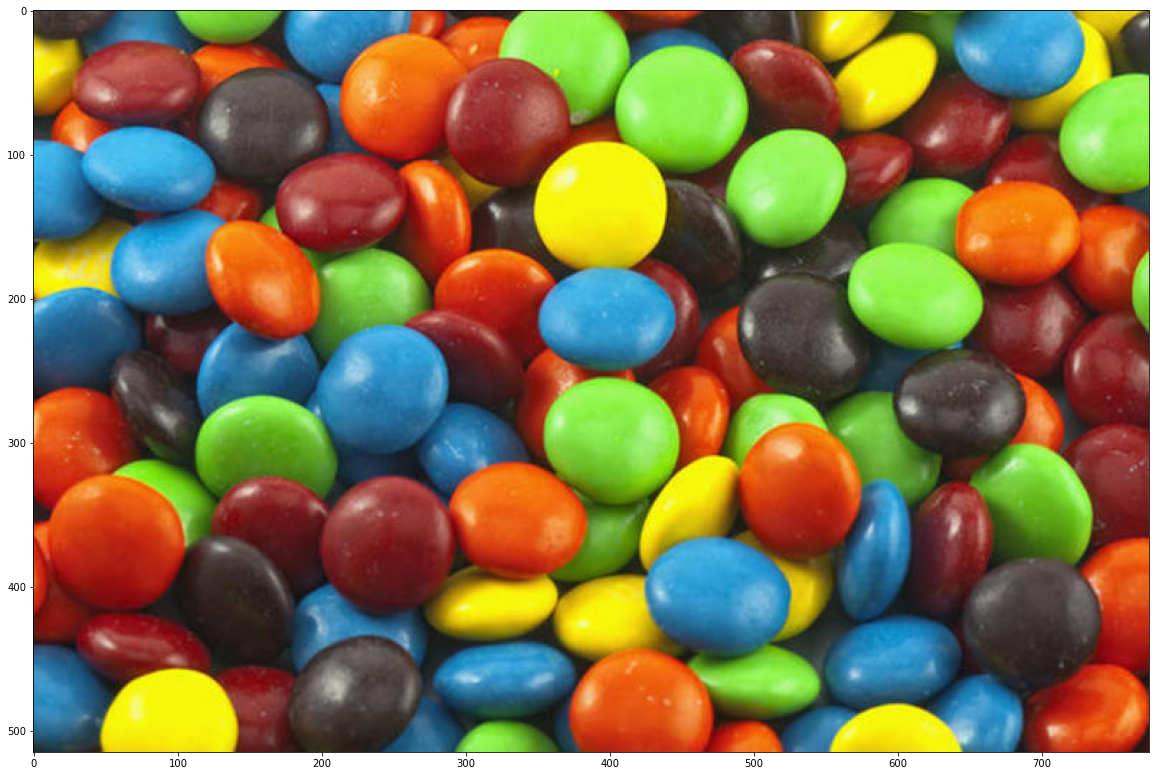

In [29]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,15));
plt.imshow(img);

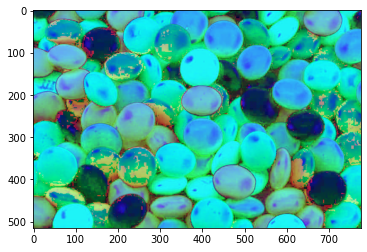

In [23]:
# Split the H,S and V channels 
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
H,S,V = cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))
plt.imshow(hsv_img)

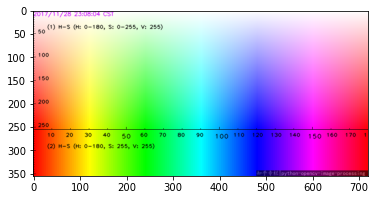

In [19]:
hsv_map = cv2.imread('img/hsv.png')
plt.imshow(cv2.cvtColor(hsv_map, cv2.COLOR_BGR2RGB))

[Hint](# "cv2.cvtColor") 

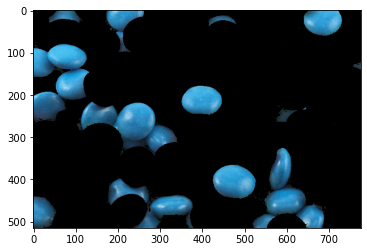

In [48]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
low  = (90,50,20)
high = (120,260,500)
mask = cv2.inRange(hsv_img, low, high)
pic_blue = img.copy()
pic_blue[mask == 0] = [0,0,0]
plt.imshow(pic_blue)

[Hint](# "cv2.inRange") 

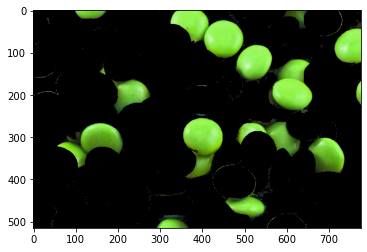

In [50]:
# Repeat the same but now with the greens
low_g  = (35,50,20)
high_g = (85,260,500)
mask_g = cv2.inRange(hsv_img, low_g, high_g)
pic_green = img.copy()
pic_green[mask_g == 0] = [0,0,0]
plt.imshow(pic_green)

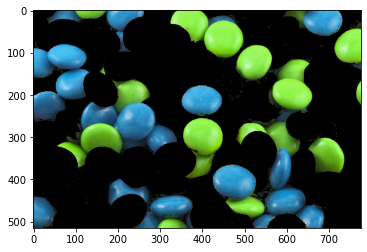

In [52]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
both = cv2.add(pic_blue,pic_green)
plt.imshow(both)

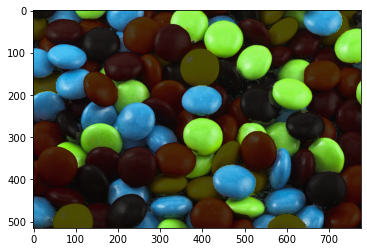

In [56]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image
alpha = 0.7
ov = cv2.addWeighted(both,alpha, img,1-alpha,0)
plt.imshow(ov)

[Hint](# "cv2.addWeighted") 

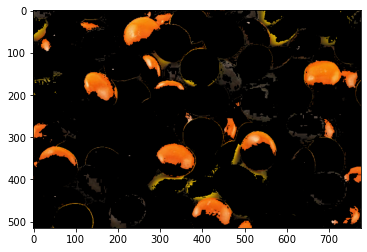

In [62]:
low_o  = (10,50,20)
high_o = (24,260,600)
mask_o = cv2.inRange(hsv_img, low_o, high_o)
pic_orange = img.copy()
pic_orange[mask_o == 0] = [0,0,0]
plt.imshow(pic_orange)

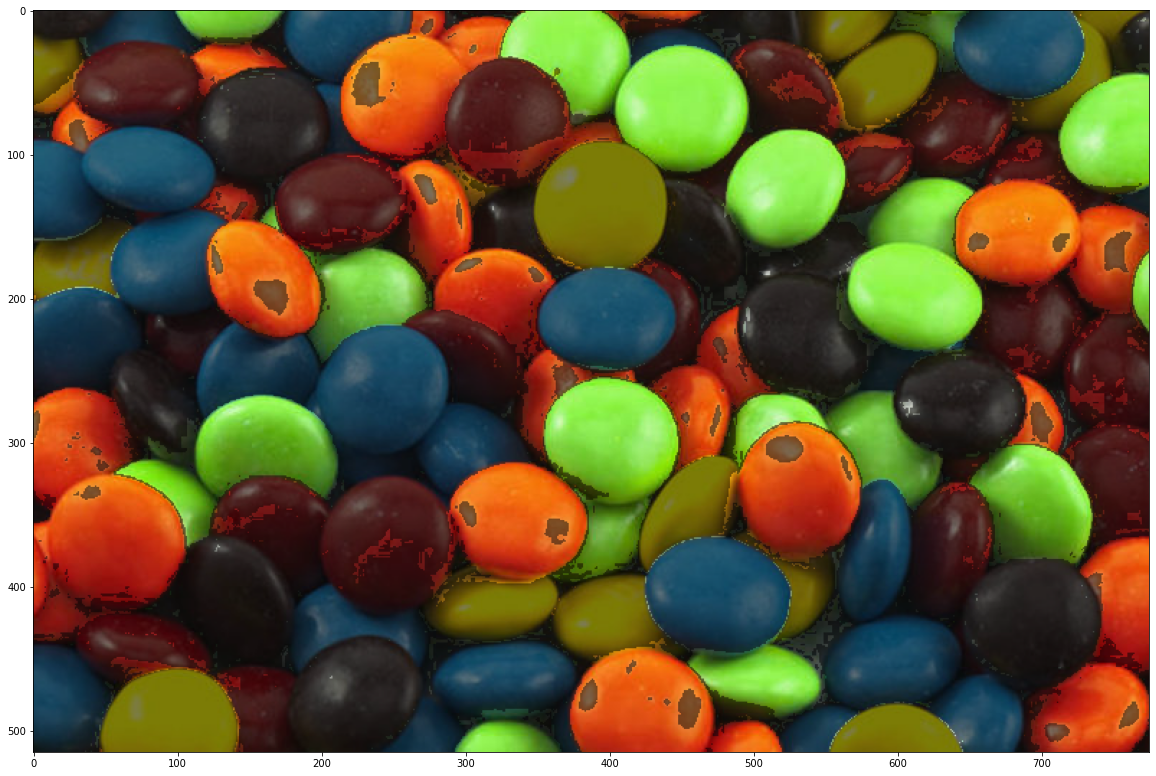

In [9]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?